# Datetime Module

Chiara V. V. L  

## Importaciones y carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/EDA/minambiente2023.csv'

column_names = ['fecha', 'pm10', 'pm2-5', 'velo-viento', 'precipitacion', 'direccion', 'o3', 'co', 'no', 'no2', 'nox']
df = pd.read_csv(url, sep=';', names=column_names)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fecha          8760 non-null   object
 1   pm10           8760 non-null   object
 2   pm2-5          8760 non-null   object
 3   velo-viento    8760 non-null   object
 4   precipitacion  8760 non-null   object
 5   direccion      8760 non-null   object
 6   o3             8760 non-null   object
 7   co             8760 non-null   object
 8   no             8760 non-null   object
 9   no2            8760 non-null   object
 10  nox            8760 non-null   object
dtypes: object(11)
memory usage: 752.9+ KB


## Limpieza de datos

In [4]:
df.replace('----', pd.NA, inplace=True)
df.dropna(inplace=True)
df['fecha'] = df['fecha'].str.replace('24:00', '00:00')

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 8319 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha          416 non-null    datetime64[ns]
 1   pm10           416 non-null    object        
 2   pm2-5          416 non-null    object        
 3   velo-viento    416 non-null    object        
 4   precipitacion  416 non-null    object        
 5   direccion      416 non-null    object        
 6   o3             416 non-null    object        
 7   co             416 non-null    object        
 8   no             416 non-null    object        
 9   no2            416 non-null    object        
 10  nox            416 non-null    object        
dtypes: datetime64[ns](1), object(10)
memory usage: 39.0+ KB


## Gráficas

### Grupales

In [7]:
contaminantes = ['pm10', 'pm2-5', 'o3', 'co', 'no', 'no2', 'nox']
factores = ['velo-viento', 'precipitacion', 'direccion']

for col in factores:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in contaminantes:
    df[col] = pd.to_numeric(df[col], errors='coerce')

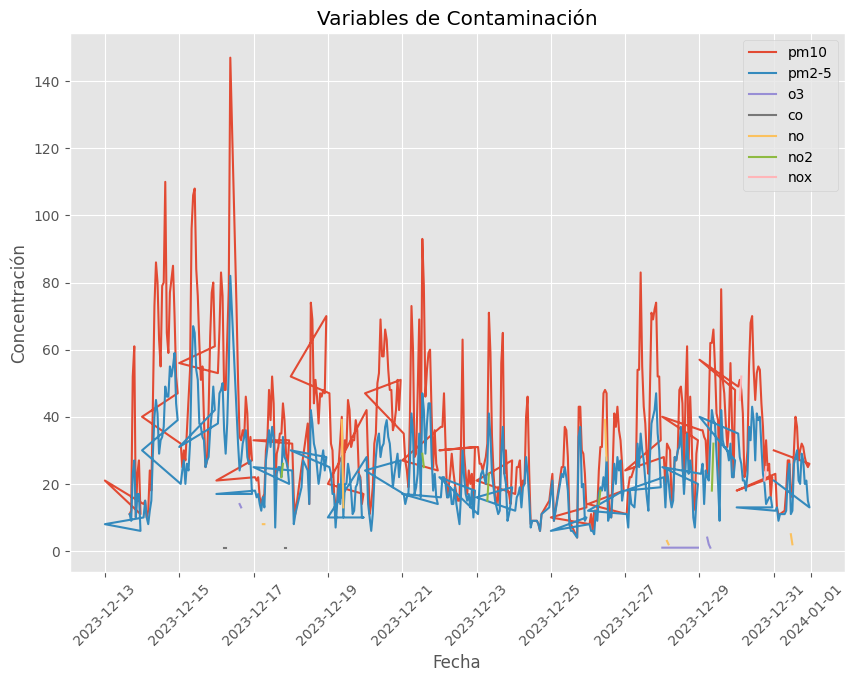

In [8]:
plt.figure(figsize=(10,7))

for col in contaminantes:
    plt.plot(df['fecha'], df[col], label=col)

plt.title('Variables de Contaminación')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.legend()
plt.xticks(rotation=45)
plt.show()

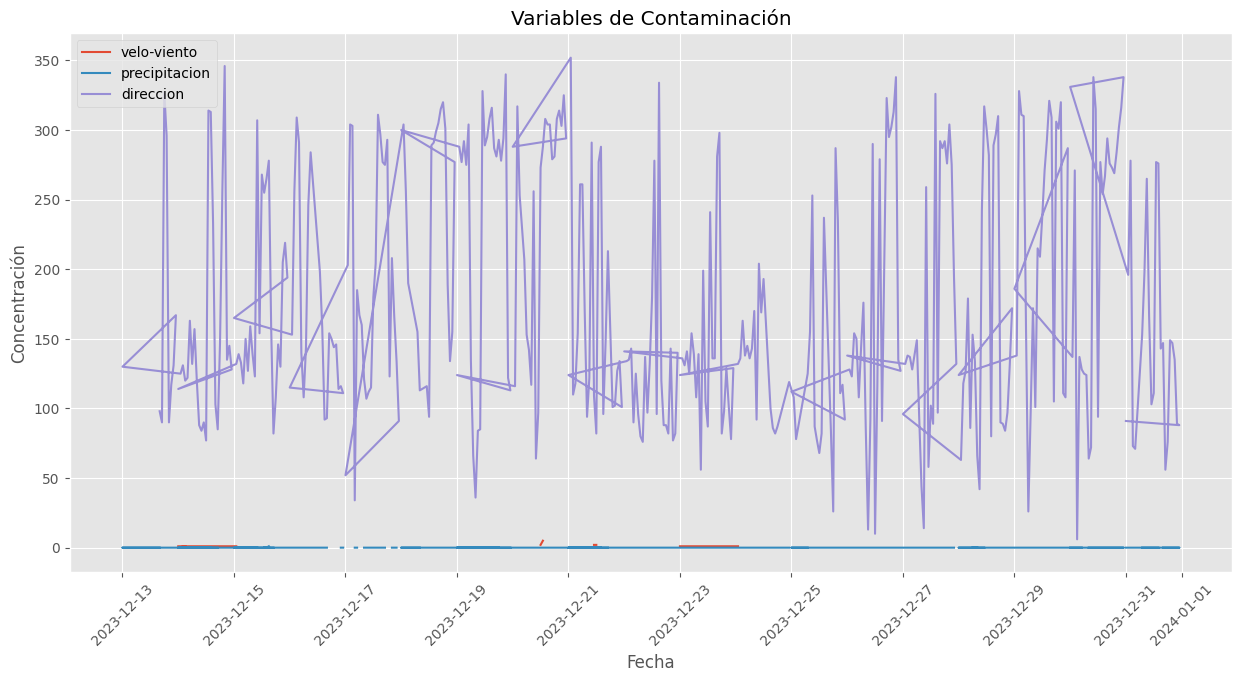

In [9]:
plt.figure(figsize=(15, 7))

for col in factores:
    plt.plot(df['fecha'], df[col], label=col)

plt.title('Variables de Contaminación')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Individuales

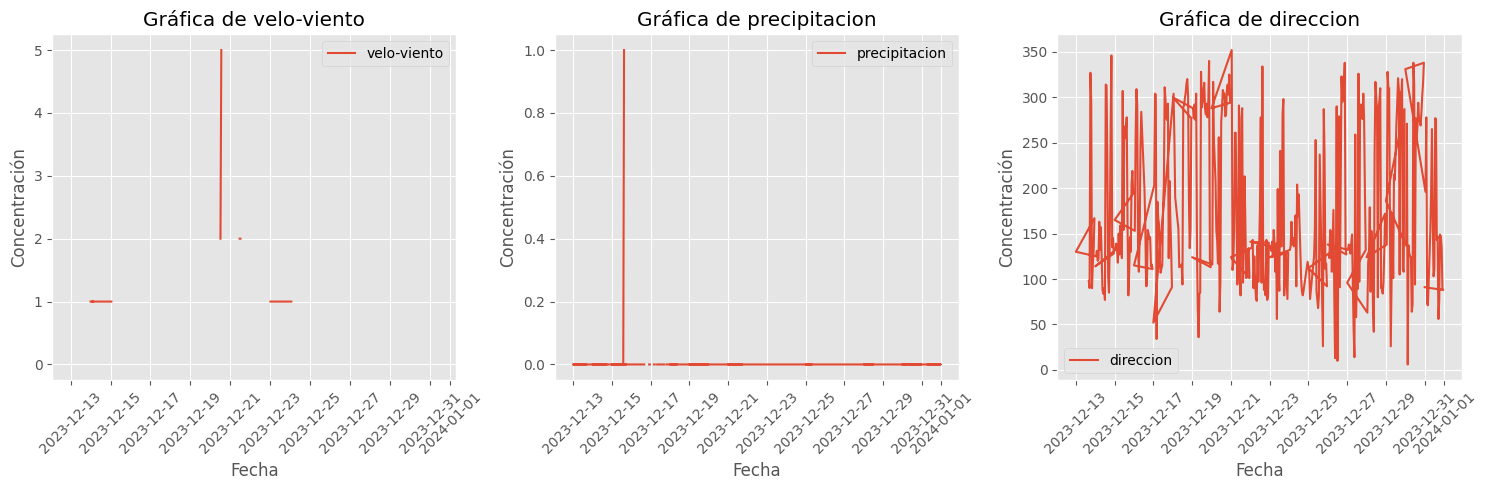

In [10]:
num_cols = len(factores)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5*num_cols, 5))

for i, col in enumerate(factores):
    axes[i].plot(df['fecha'], df[col], label=col)
    axes[i].set_title(f'Gráfica de {col}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Concentración')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

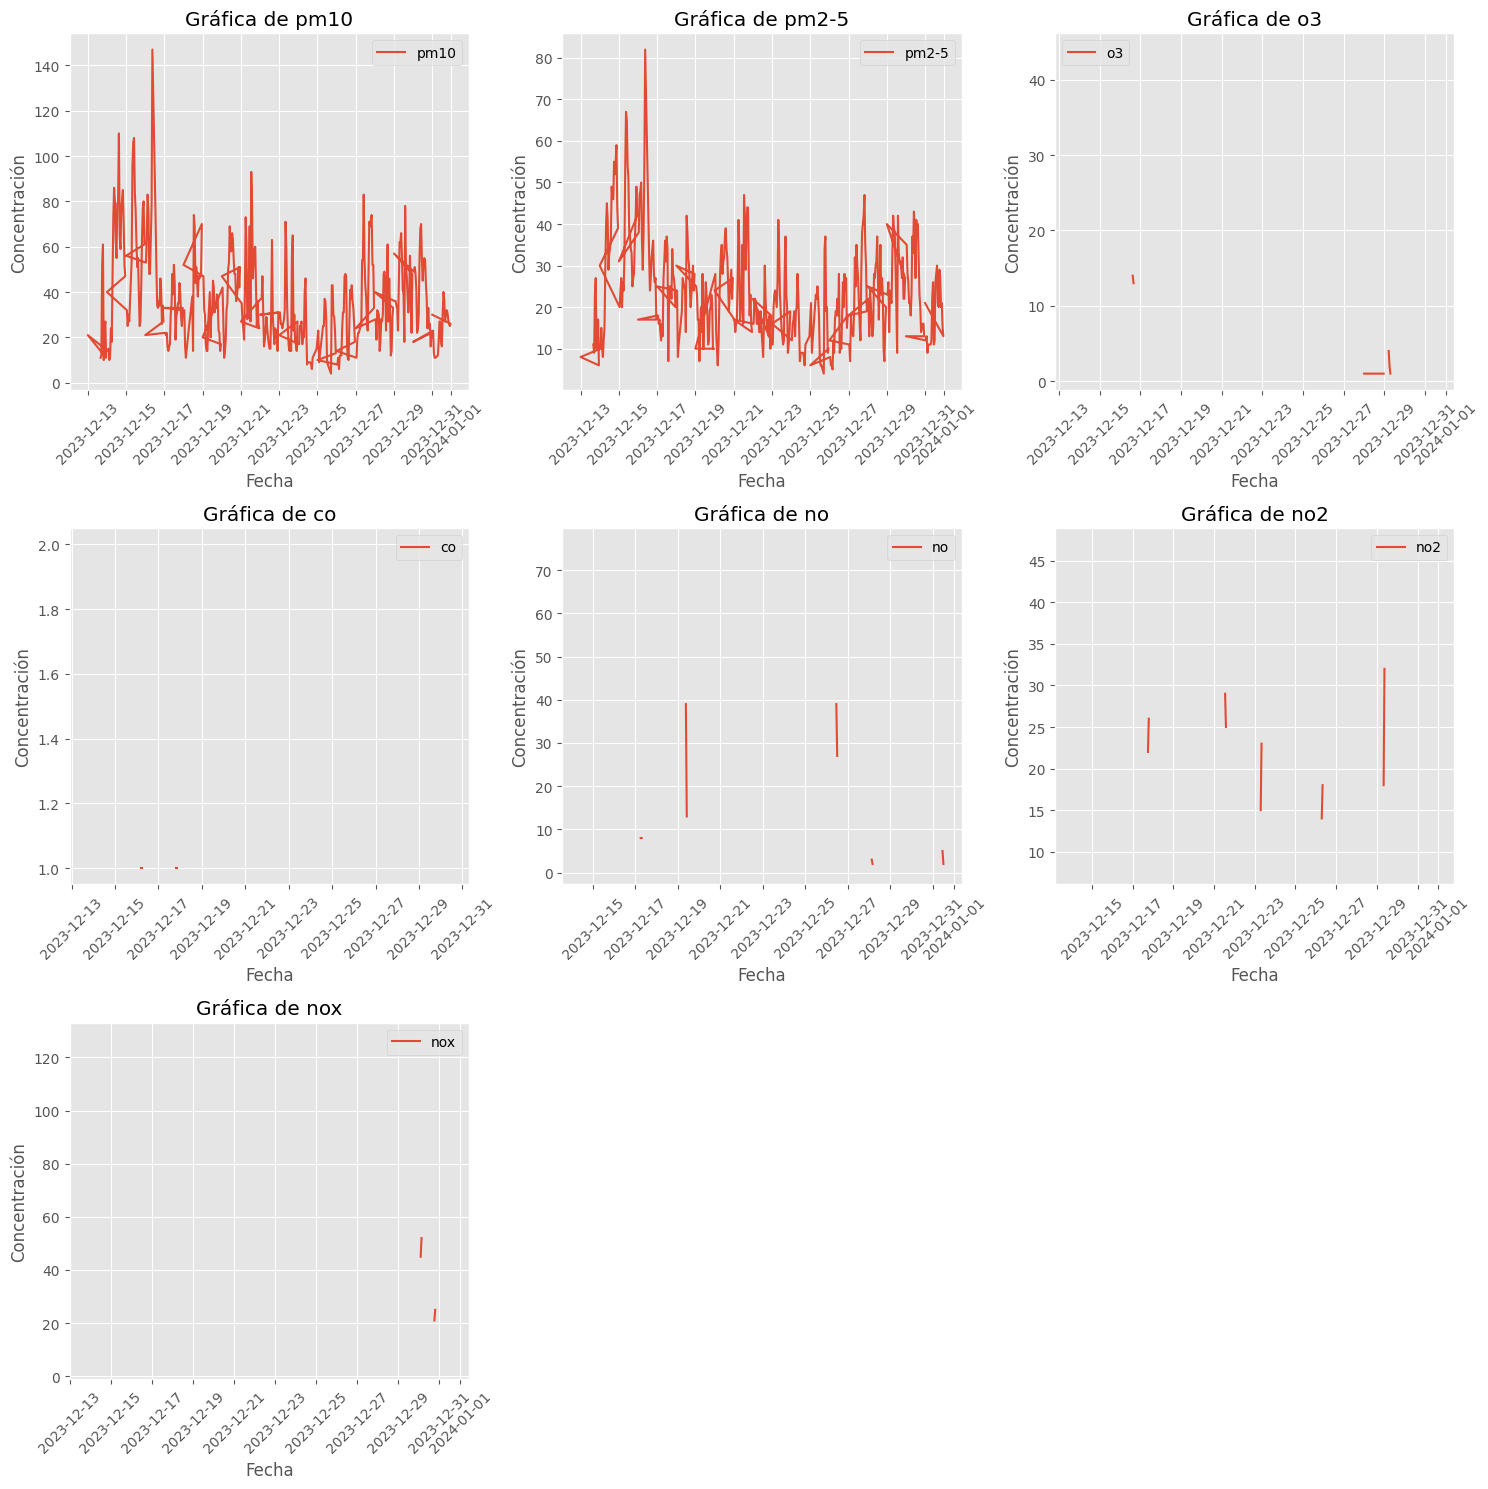

In [11]:
num_cols = 3
num_rows = len(contaminantes) // num_cols + (len(contaminantes) % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(contaminantes):
    axes[i].plot(df['fecha'], df[col], label=col)
    axes[i].set_title(f'Gráfica de {col}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Concentración')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(contaminantes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()